# Visualization with Matplotlib

In [203]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Plotting from a script

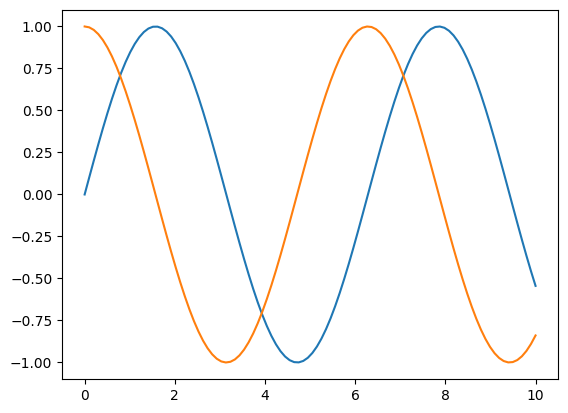

In [204]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

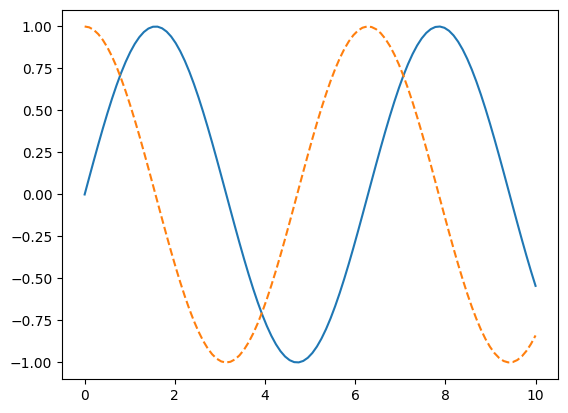

In [205]:
y = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [206]:
fig.savefig('my_figure.png')

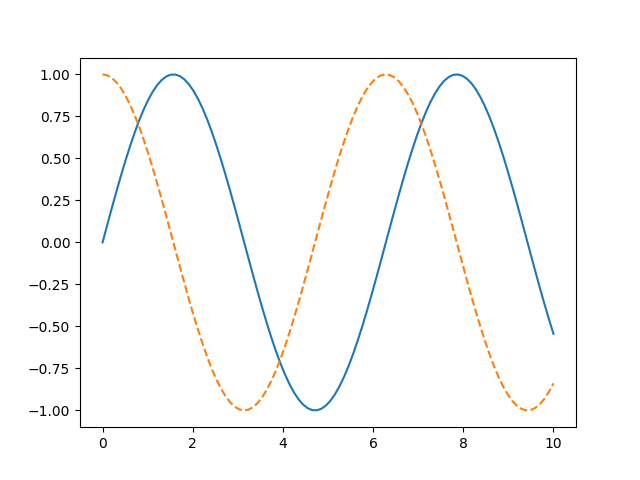

In [207]:
from IPython.display import Image
Image('my_figure.png')

## Two interfaces for the Price of One

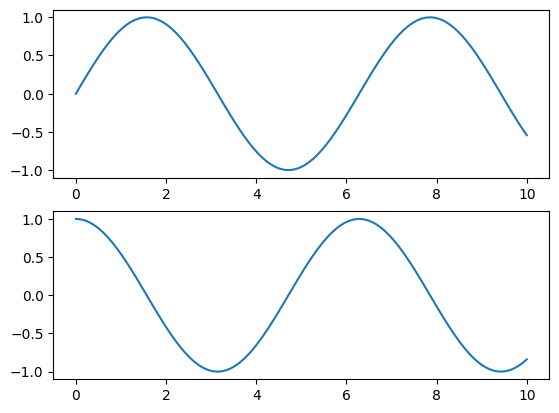

In [208]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

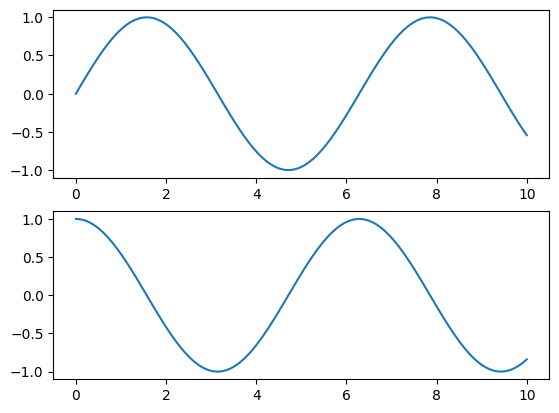

In [209]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Simple Line Plots

##  Adjusting the Plot: Line Colors and Styles

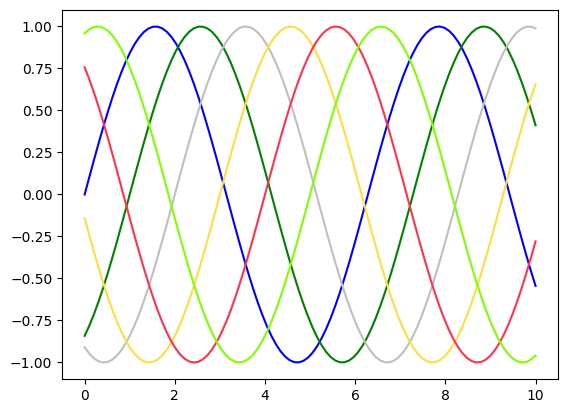

In [210]:
fig = plt.figure()
ax = plt.axes()

plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

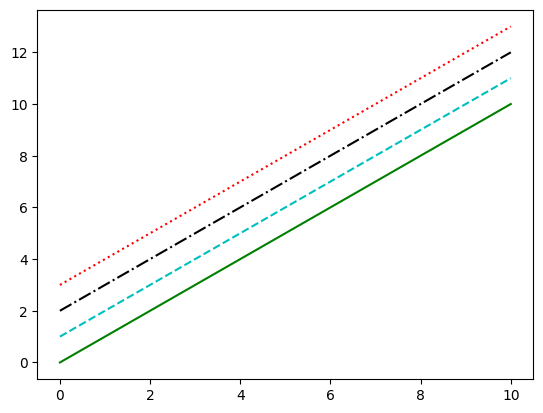

In [211]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## Adjusting the Plot: Axes Limits

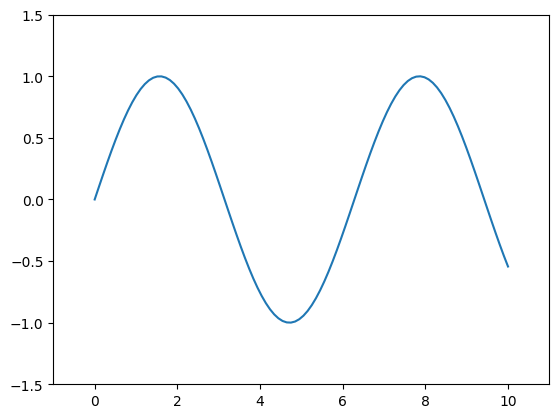

In [212]:
plt.plot(x, np.sin(x))

plt.axis([-1, 11, -1.5, 1.5]);  #Written like this
#plt.xlim(-1, 11)               Or like this
#plt.ylim(-1.5, 1.5);

## Labeling Plots

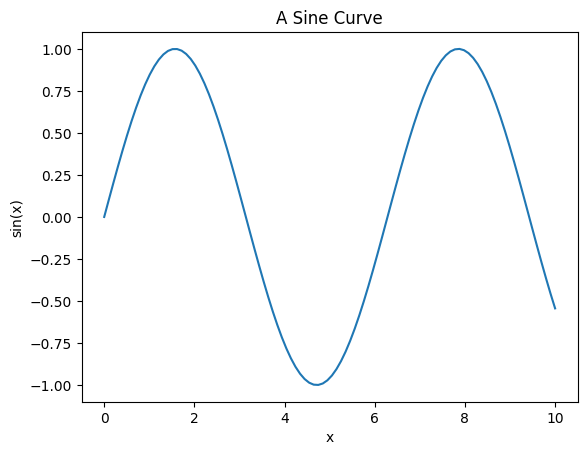

In [213]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

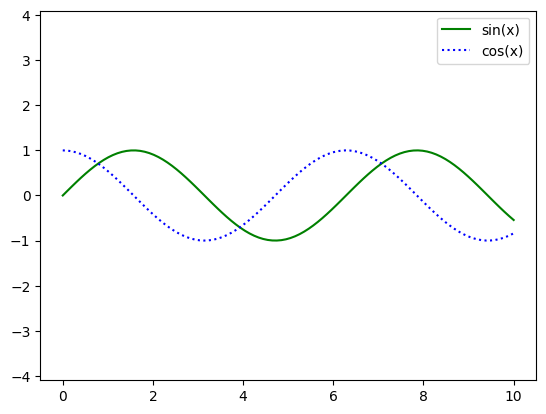

In [214]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Complete Example

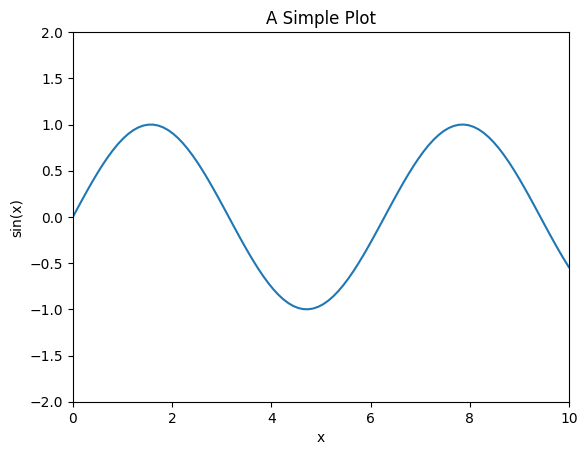

In [215]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

## Scatter plots with plt.plot()

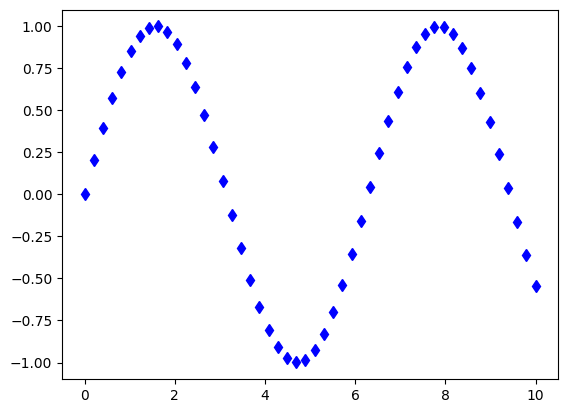

In [216]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

plt.plot(x, y, 'd', color='blue');

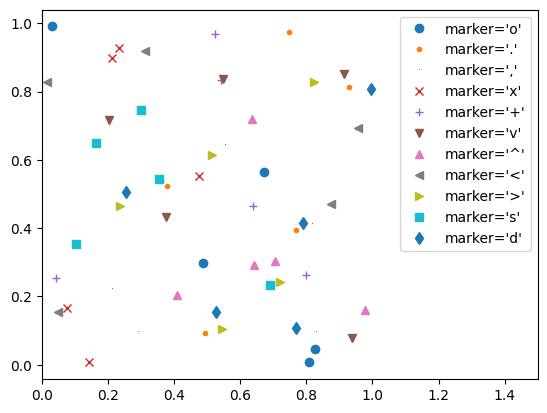

In [217]:
rng = np.random.RandomState(99)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.5);

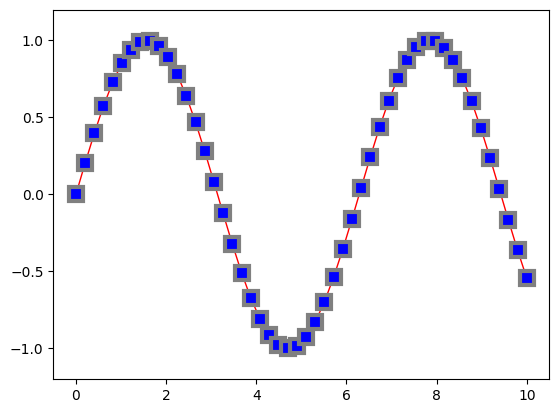

In [218]:
plt.plot(x, y, '-s', color='red',
         markersize=10, linewidth=1,
         markerfacecolor='blue',
         markeredgecolor='gray',
         markeredgewidth=3)
plt.ylim(-1.2, 1.2);

## Scatter plots with plt.scatter

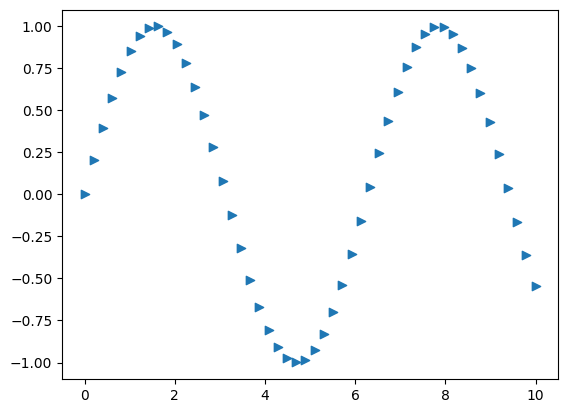

In [219]:
plt.scatter(x, y, marker='>');

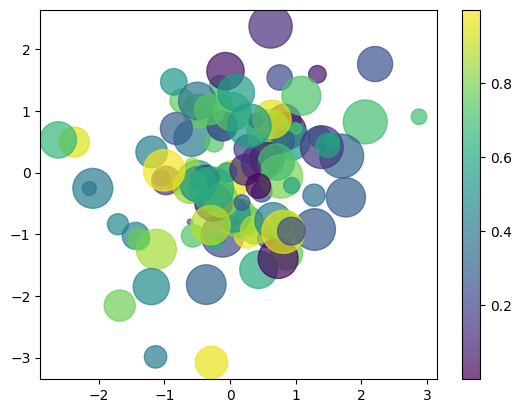

In [220]:
rng = np.random.RandomState(99)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.7,
            cmap='viridis')
plt.colorbar();  # show color scale

# Visualizing Errors

## Basic Errorbars

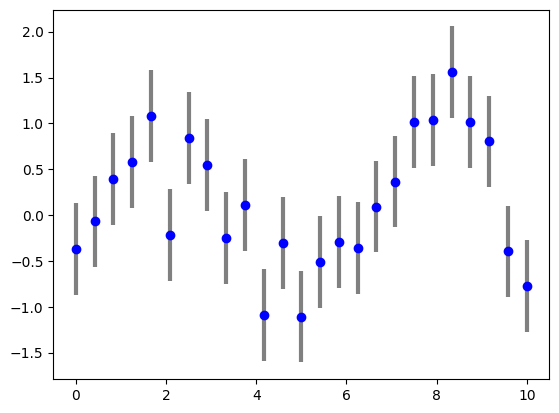

In [221]:
x = np.linspace(0, 10, 25)
dy = .5
y = np.sin(x) + dy * np.random.randn(25)

plt.errorbar(x, y, yerr=dy, fmt='o', color='blue',
             ecolor='gray', elinewidth=3, capsize=0);

# Density and Contour Plots

In [222]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

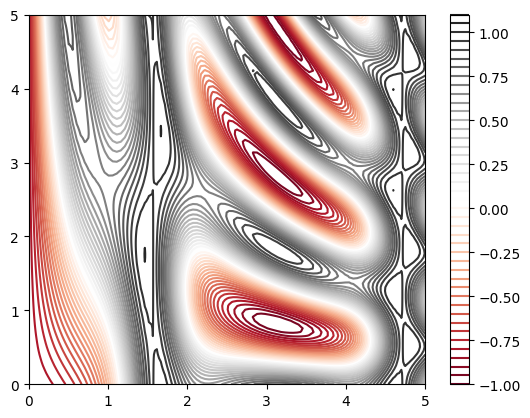

In [223]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 50, cmap='RdGy');
plt.colorbar();

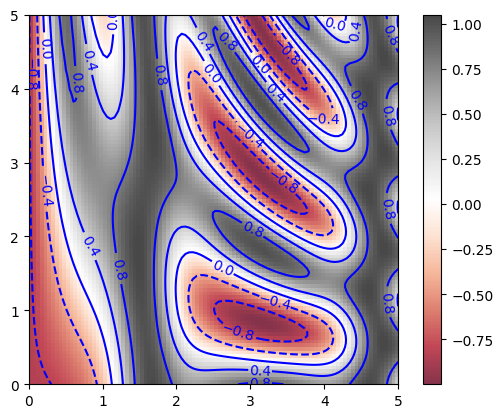

In [224]:
contours = plt.contour(X, Y, Z, 5, colors='blue')
plt.clabel(contours, inline=True, fontsize=10)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.8)
plt.colorbar();

# Histogram, Binnings and Density

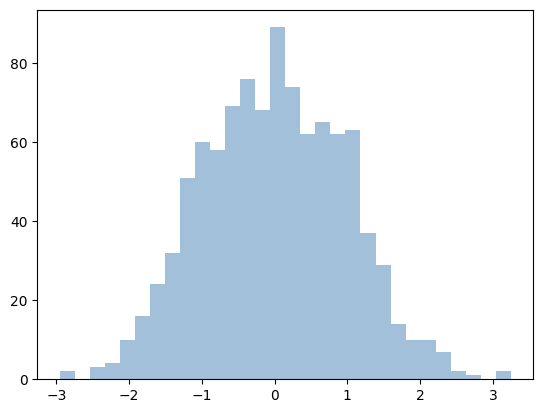

In [225]:
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

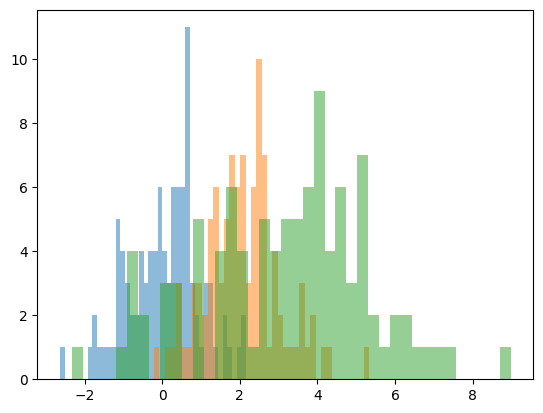

In [226]:
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(2, 1, 100)
x3 = np.random.normal(3, 2, 100)

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Two-Dimensional Histograms and Binnings

In [227]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### Two-Dimensional Histogram

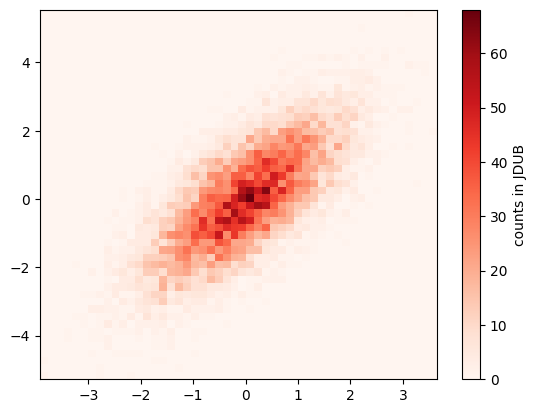

In [228]:
plt.hist2d(x, y, bins=50, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in JDUB')

### Hexagonal Binnings

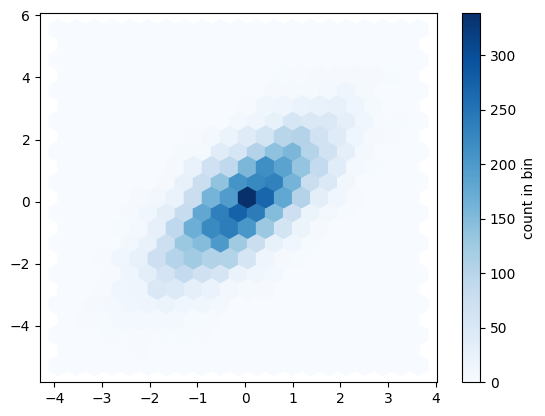

In [229]:
plt.hexbin(x, y, gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernal Density estimation

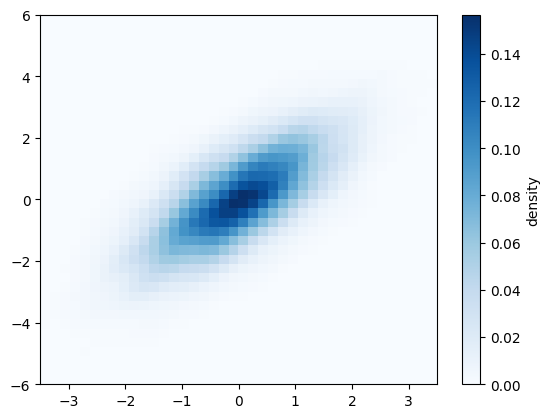

In [230]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

# Customizing Plot Legends

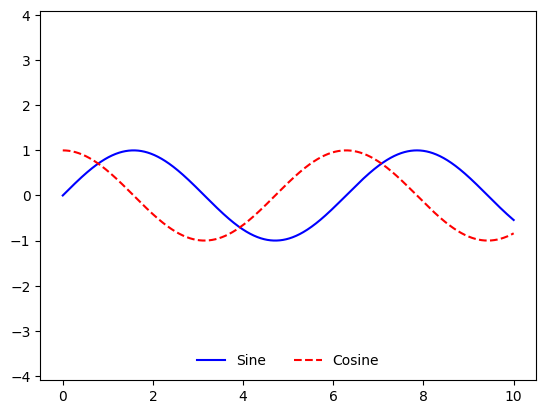

In [231]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(frameon=False, loc='lower center', ncol=2);

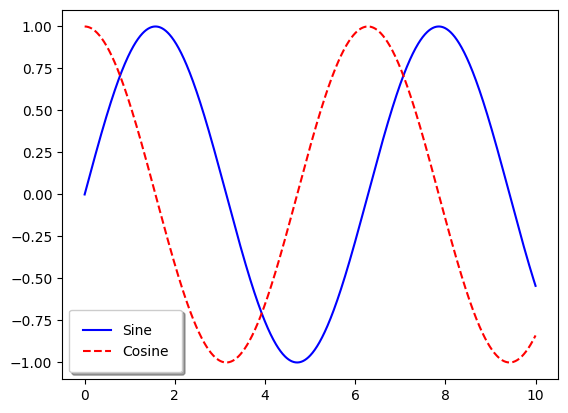

In [232]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

## Choosing Elements for legend

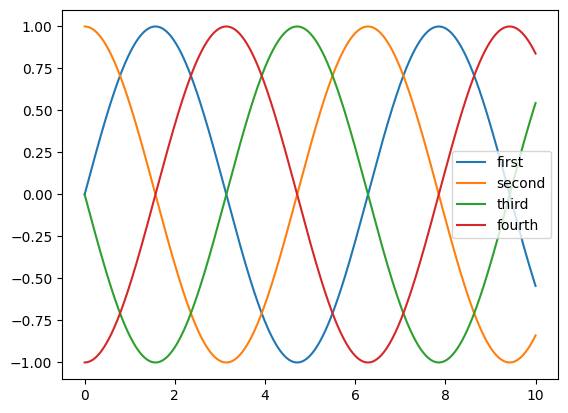

In [233]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:4], ['first', 'second', 'third', 'fourth']);

## Multiple Legends

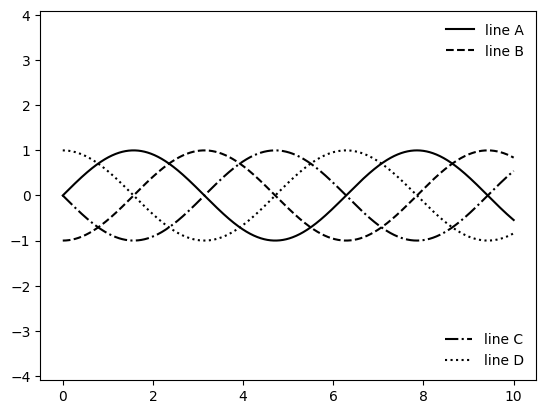

In [234]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

# Customizing Colorbars

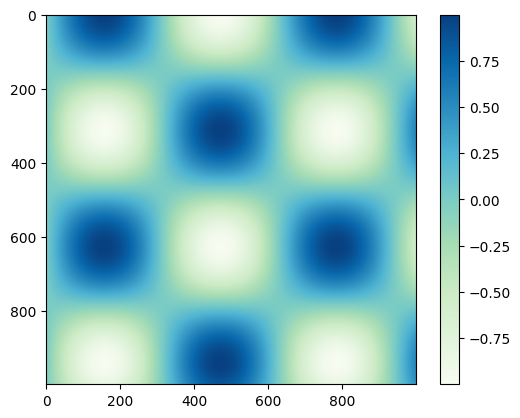

In [235]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='GnBu')
plt.colorbar();

## Choosing the colormap

In [238]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

### Color Limits and extensions

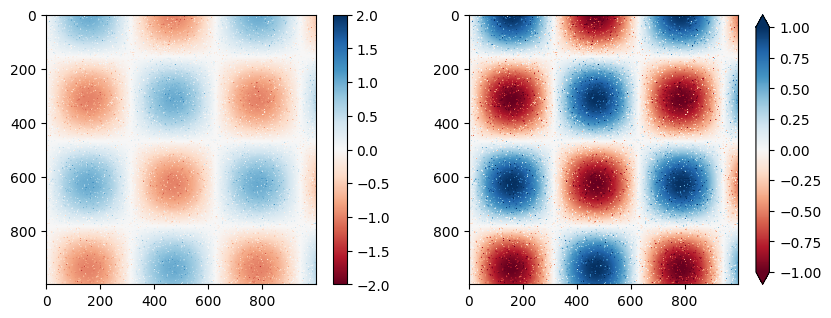

In [236]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
plt.clim(-2, 2)

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

# Multiple Subplots

## Subplots by hand

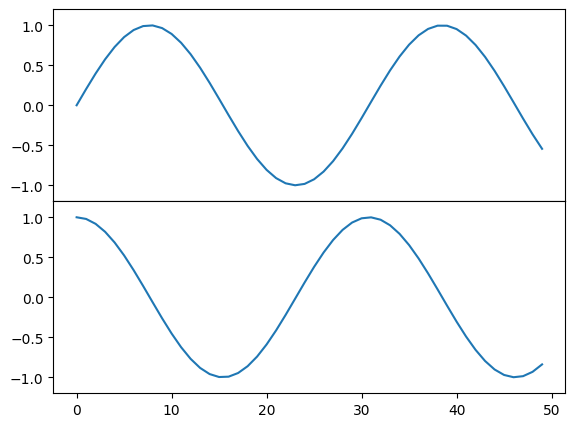

In [241]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## Simple Grids of Subplots

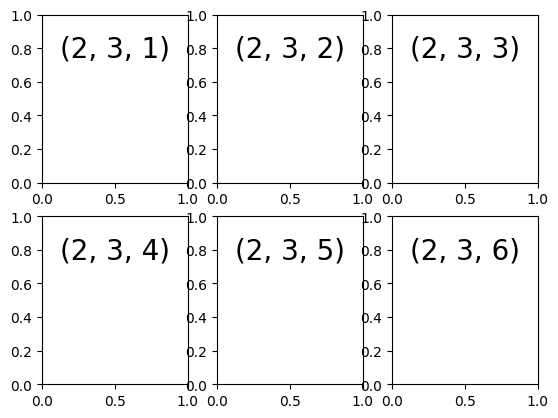

In [259]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(.5, .75, str((2, 3, i)),
             fontsize=20, ha='center')

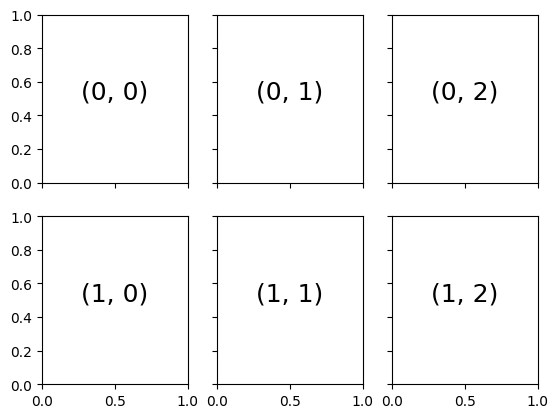

In [265]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

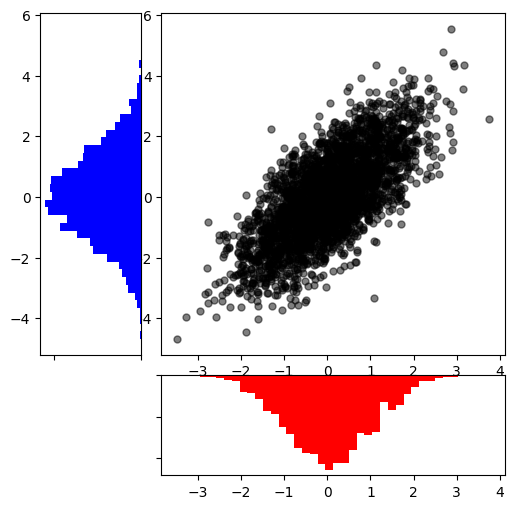

In [278]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=5, alpha=0.5)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='blue')
y_hist.invert_xaxis()

# Text and Annotation